# Life Cycle Of Machine Learning Project

1. Understanding the Problem Statement.

2. Data Collection.

3. Data Checks to Perform.

4. Exploratory Data Analysis.

5. Data Pre-Processing.

6. Model Training.

7. Choose the Best Model.

# Data Collection

The data consists of 15 Columns and 14383 Rows

# Import the Packages

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import (f1_score,accuracy_score,precision_score,roc_auc_score,
                                classification_report,roc_curve,recall_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



# Importing the CSV Dataset from Pandas library

In [3]:

df = pd.read_csv(r"C:\Users\iamda\Downloads\fraud_data.csv")

# Show Top 5 Rows

In [4]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


# Shape of the Datasets

In [5]:
print(f"Shape of the Datasets: {df.shape}")

Shape of the Datasets: (14446, 15)



# Checking the null value

In [6]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Checking the Data type info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

# Check the Duplication

In [8]:
print(f"Num of Duplicated Row: {df.duplicated().sum()}")

Num of Duplicated Row: 63


Drop the Dupicated row

In [9]:
df.drop_duplicates(inplace=True)

## After droping dupicated row again the check the duplication row

In [10]:

print(f"Num of Duplicated Row: {df.duplicated().sum()}")

Num of Duplicated Row: 0


# Statistics test

In [11]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14383.000000,14383.000000,14383.000000,1.438300e+04,14383.000000,14383.000000
mean,122.719068,39.761571,-110.835395,1.063921e+05,39.761755,-110.836186
std,228.879064,5.266532,12.877931,2.900439e+05,5.309190,12.887765
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,11.945000,36.715400,-120.282400,4.930000e+02,36.768908,-120.095775
50%,51.290000,39.666200,-111.098500,1.645000e+03,39.613766,-111.203646
75%,100.140000,41.940400,-101.136000,3.543900e+04,42.275391,-100.556920
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


# Seperate the Numerical and Categorical Features

In [12]:

# define numerical and categorical
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
# print
print(f"we have {len(numerical_feature)} numerical feature {numerical_feature}")
print(f"we have {len(categorical_feature)} categorical feature {categorical_feature}")


we have 6 numerical feature ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
we have 9 categorical feature ['trans_date_trans_time', 'merchant', 'category', 'city', 'state', 'job', 'dob', 'trans_num', 'is_fraud']



# EDA 

In [13]:
df2 = df.copy()

In [14]:
df2.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [15]:

df2.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1



### Checking the Categorical Column

In [16]:

print(f"The number of merchant:   {df2['merchant'].unique()}")
print("====================================")

print(f"The number of category:    {df2['category'].unique()}")
print("=====================================")

print(f"The number of City:   {df2['city'].unique()}")
print("================================================")

print(f"The number of state:   {df2['state'].unique()}")
print("================================================")

print(f"The number of job:   {df2['job'].unique()}")
print("================================================")


The number of merchant:   ['"Stokes, Christiansen and Sipes"' 'Predovic Inc' 'Wisozk and Sons'
 'Murray-Smitham' 'Friesen Lt' '"Raynor, Reinger and Hagenes"'
 'Heller-Langosh' 'Padberg-Welch' 'McGlynn-Heathcote' 'Dooley-Thompson'
 '"Gottlieb, Considine and Schultz"' '"Moen, Reinger and Murphy"'
 '"Hauck, Dietrich and Funk"' 'Pouros-Haag' 'Goyette Inc'
 '"Baumbach, Strosin and Nicolas"' "Pacocha-O'Reilly" 'Barrows PLC'
 'Fisher-Schowalte' 'Gleason-Macejkovic' 'Kutch LLC' 'Kihn Inc'
 'Kris-Weimann' '"Kihn, Abernathy and Douglas"' 'Kiehn-Emmerich'
 '"Osinski, Ledner and Leuschke"' 'Vandervort-Funk' 'Terry-Huel'
 'Volkman-Predovic' '"Roob, Conn and Tremblay"'
 '"Tillman, Fritsch and Schmitt"' 'Larson-Moen' 'Kutch and Sons'
 '"Parisian, Schiller and Altenwerth"' 'Kozey-Boehm' 'Rau and Sons'
 'Parisian and Sons' "O'Keefe-Hudson" 'Cassin-Harvey'
 '"Schumm, Bauch and Ondrick"' '"Towne, Walker and Bore"' 'Kling-Grant'
 '"Jenkins, Hauck and Friesen"' '"Baumbach, Hodkiewicz and Walsh"'
 'Beier-Hy

In [17]:

# proportion of count data 
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("--------------------------------")

trans_date_trans_time
21-01-2019 23:09    0.034763
27-12-2020 12:46    0.034763
29-12-2020 16:57    0.034763
26-12-2020 23:29    0.034763
29-12-2020 08:37    0.034763
                      ...   
28-12-2020 20:24    0.006953
28-12-2020 20:26    0.006953
28-12-2020 20:28    0.006953
28-12-2020 20:30    0.006953
22-01-2019 00:55    0.006953
Name: proportion, Length: 12126, dtype: float64
--------------------------------
merchant
Kilback LLC          0.403254
Cormier LLC          0.333727
Kutch and Sons       0.312869
Rau and Sons         0.298964
McDermott-Weimann    0.292011
                       ...   
Lemke and Sons       0.027811
Jaskolski-Dibbert    0.027811
Wiegand-Lowe         0.027811
Jerde-Hermann        0.027811
Kovacek Lt           0.020858
Name: proportion, Length: 693, dtype: float64
--------------------------------
category
grocery_pos       11.061670
gas_transport      9.900577
shopping_net       9.685045
shopping_pos       9.365223
home               9.059306
kids_pets  


### Droping the waste columns like:

1. trans_date_trans_time

2. dob

3. trans_num

In [18]:
df2.drop(['trans_num','trans_date_trans_time','dob'],axis=1,inplace=True)

### Statistics Technique using on the Categorical feature

In [22]:
categorical_feature.remove('trans_date_trans_time')

In [24]:
categorical_feature.remove('dob')

In [26]:
categorical_feature.remove('trans_num')

In [27]:
from scipy.stats import chi2_contingency

chi_test=[]

for col in categorical_feature:
    if chi2_contingency(pd.crosstab(df2['is_fraud'],df2[col]))[1]<0.05:
        chi_test.append('Reject Null hypothesis')
    else:
        chi_test.append('Fail to reject null hypothesis')

result = pd.DataFrame(data=[categorical_feature,chi_test]).T
result.columns = ['column','Hypothesis Result']
result

,column,Hypothesis Result
0,merchant,Reject Null hypothesis
1,category,Reject Null hypothesis
2,city,Reject Null hypothesis
3,state,Reject Null hypothesis
4,job,Reject Null hypothesis
5,is_fraud,Reject Null hypothesis


In [28]:
df2.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1
1,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1
2,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1
3,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1
4,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1


### Merchant Column

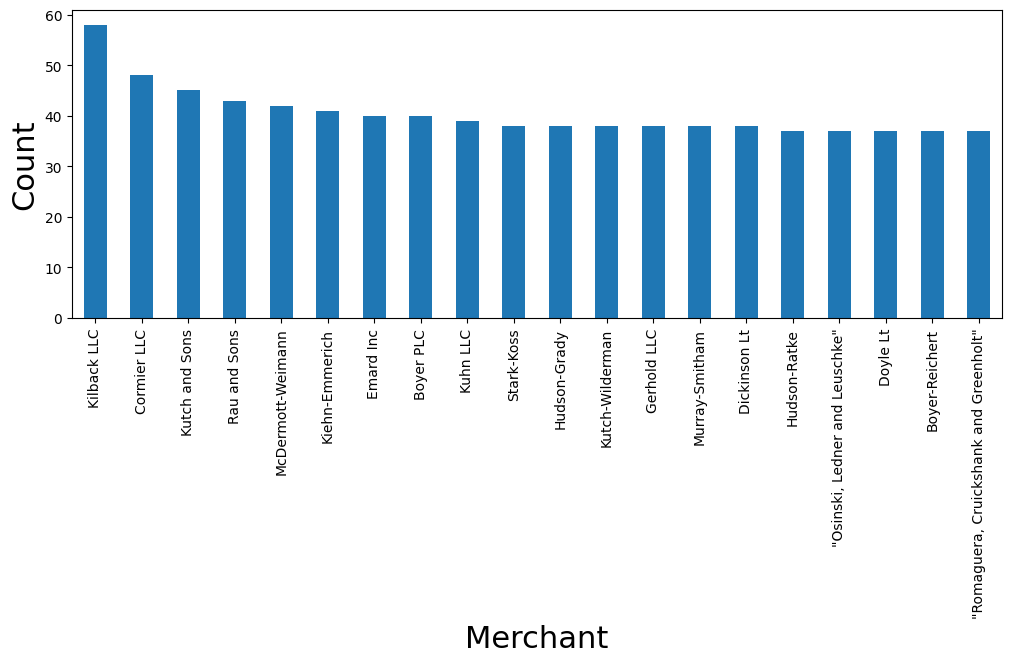

In [29]:

plt.figure(figsize=(12,4))
df2['merchant'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Merchant',size=22)
plt.ylabel('Count',size=22)
plt.show()


### Category Column

In [30]:

df2['category'].value_counts()

category
grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
entertainment      949
health_fitness     890
food_dining        869
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: count, dtype: int64

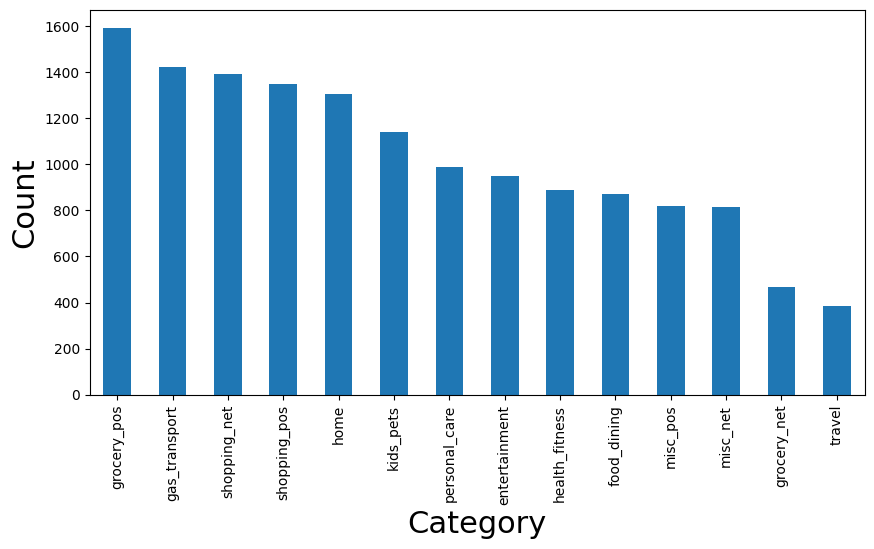

In [31]:

plt.figure(figsize=(10,5))
df2['category'].value_counts().plot(kind='bar')
plt.xlabel('Category',size=22)
plt.ylabel('Count',size=22)
plt.show()


### Amt

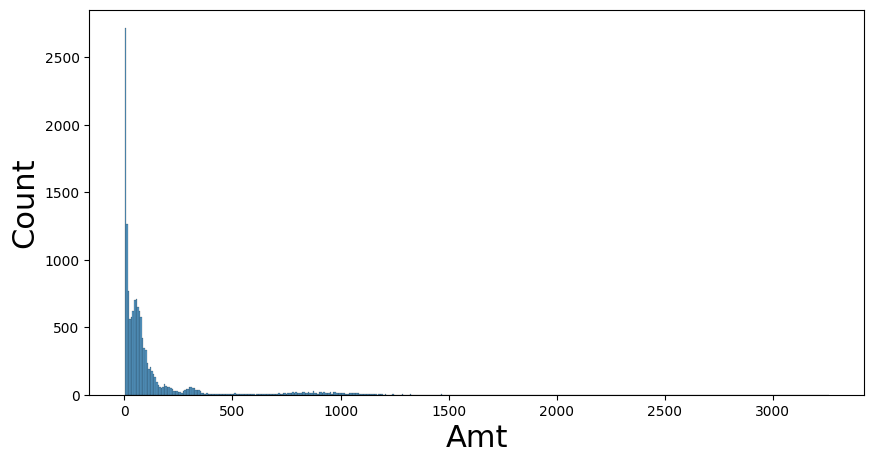

In [32]:

plt.figure(figsize=(10,5))
sns.histplot(x='amt',data=df2)
plt.xlabel('Amt',size=22)
plt.ylabel('Count',size=22)
plt.show()


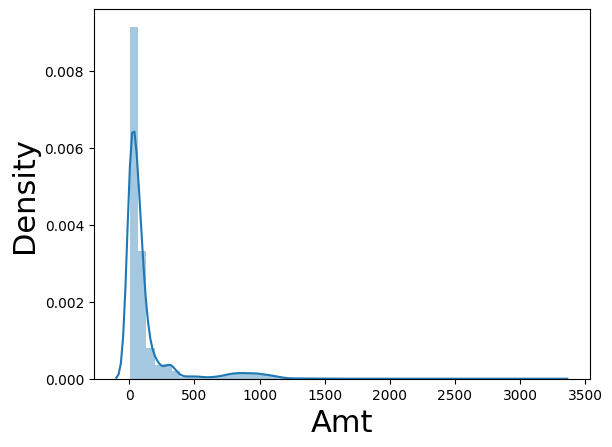

In [33]:

sns.distplot(df2['amt'])
plt.xlabel('Amt',size=22)
plt.ylabel('Density',size=22)
plt.show()


### City

In [34]:

df2['city'].value_counts()

city
Phoenix          297
Centerview       197
Orient           192
Sutherland       187
Fort Washakie    187
                ... 
Downey            10
Pleasant Hill      8
Buellton           8
Wappapello         8
Vacaville          7
Name: count, Length: 176, dtype: int64

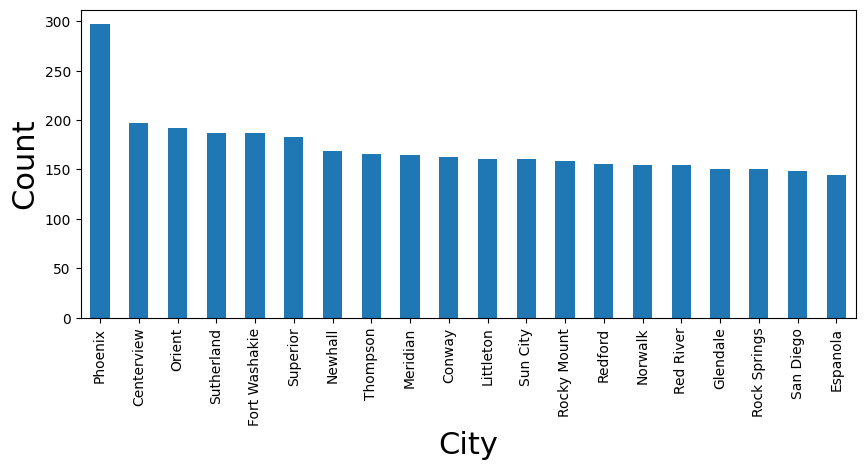

In [35]:
plt.figure(figsize=(10,4))
df2['city'].value_counts()[:20].plot(kind='bar')
plt.xlabel('City',size=22)
plt.ylabel('Count',size=22)
plt.show()


### State

In [36]:

df2['state'].value_counts()

state
CA    3366
MO    2324
NE    1438
OR    1211
WA    1150
WY    1100
NM    1003
CO     856
AZ     673
UT     585
ID     347
HI     172
AK     158
Name: count, dtype: int64

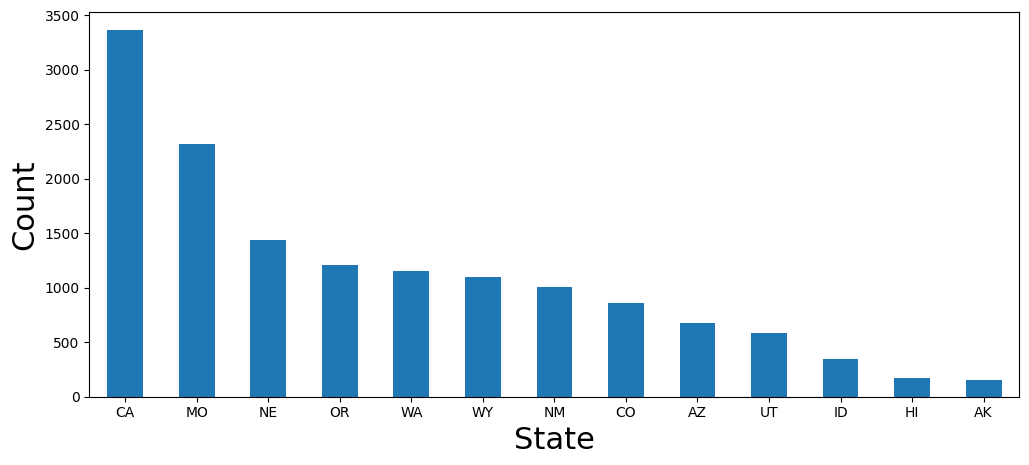

In [37]:

plt.figure(figsize=(12,5))
df2['state'].value_counts().plot(kind='bar')
plt.xlabel('State',size=22)
plt.ylabel('Count',size=22)
plt.xticks(rotation='horizontal')
plt.show()

### lat

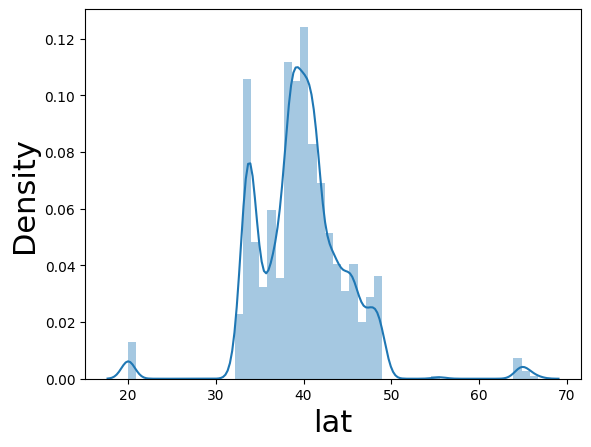

In [38]:

sns.distplot(df2['lat'])
plt.xlabel('lat',size=22)
plt.ylabel('Density',size=22)
plt.show()

### long

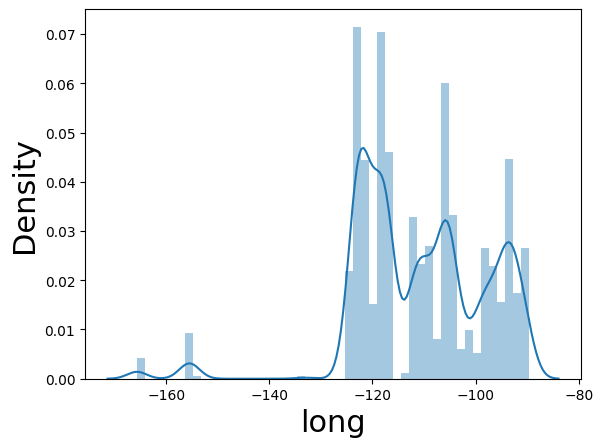

In [39]:

sns.distplot(df2['long'])
plt.xlabel('long',size=22)
plt.ylabel('Density',size=22)
plt.show()



# Job

In [40]:

df2['job'].value_counts()

job
"Surveyor, minerals"            250
"Surveyor, land/geomatics"      240
Land/geomatics surveyor         225
Insurance broker                209
Electronics engineer            197
                               ... 
Landscape architect               9
Systems developer                 9
Research scientist (medical)      8
Information officer               8
Clinical cytogeneticist           7
Name: count, Length: 163, dtype: int64

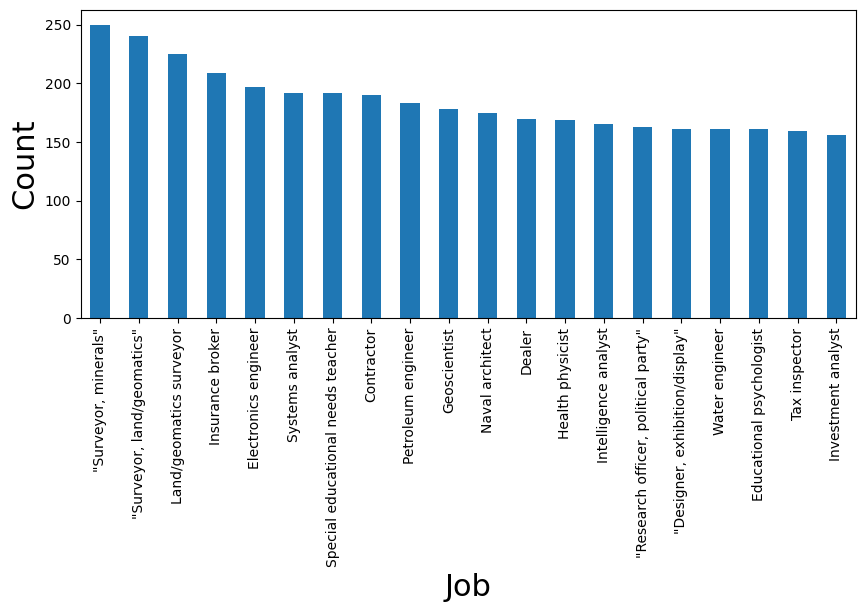

In [41]:

plt.figure(figsize=(10,4))
df2['job'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Job',size=22)
plt.ylabel('Count',size=22)
plt.show()



# Feature Enginering

### Show Top 5 Rows

In [42]:
df2.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1
1,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1
2,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1
3,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1
4,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1


Based on the EDA I'll drop the few columns

1. merchant

2. state

In [43]:

df2.drop(['merchant','state'],axis=1,inplace=True)

In [44]:
df2.head()

,category,amt,city,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,grocery_net,14.37,Wales,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1
1,shopping_net,966.11,Wales,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1
2,misc_pos,49.61,Wales,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1
3,grocery_pos,295.26,Wales,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1
4,health_fitness,18.17,Wales,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1



### In City column select a threshold is 100

Convert Less then 100 city to others city

In [45]:
city_count = df2['city'].value_counts()

In [46]:
keep_city = city_count[city_count>=100].index

def function_city(text):
    if text in keep_city:
        return text
    else:
        return "Others city"

df2['city'] = df2['city'].apply(function_city)

In [47]:
df2['city'].value_counts()

city
Others city     6190
Phoenix          297
Centerview       197
Orient           192
Sutherland       187
                ... 
Ruidoso          105
Santa Monica     104
Athena           103
Laramie          101
Lowell           100
Name: count, Length: 61, dtype: int64


### In Job feature select a threshold is 100

convert Less then 100 jobs to the Other Jobs

In [48]:
job_num = df2['job'].value_counts()

In [49]:
keep_job = job_num[job_num>=100].index
def function_job(text):
    if text in keep_job:
        return text
    else:
        return "Others Jobs"

df2['job'] = df2['job'].apply(function_job)


In [50]:
df2['job'].value_counts()

job
Others Jobs                   5224
"Surveyor, minerals"           250
"Surveyor, land/geomatics"     240
Land/geomatics surveyor        225
Insurance broker               209
                              ... 
Town planner                   106
"Engineer, production"         106
Airline pilot                  106
Licensed conveyancer           105
Network engineer               100
Name: count, Length: 65, dtype: int64

In [51]:

df2.head()

,category,amt,city,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,grocery_net,14.37,Others city,64.7556,-165.6723,145,Others Jobs,65.654142,-164.722603,1
1,shopping_net,966.11,Others city,64.7556,-165.6723,145,Others Jobs,65.468863,-165.473127,1
2,misc_pos,49.61,Others city,64.7556,-165.6723,145,Others Jobs,65.347667,-165.914542,1
3,grocery_pos,295.26,Others city,64.7556,-165.6723,145,Others Jobs,64.445035,-166.080207,1
4,health_fitness,18.17,Others city,64.7556,-165.6723,145,Others Jobs,65.447094,-165.446843,1


# Checking the is_fraud column 

In [52]:
df2['is_fraud'].unique()

array(['1', '1"2020-12-24 16:56:24"', '0', '0"2019-01-01 00:00:44"'],
      dtype=object)

There are some mistake in is_fraud column and we change the data type also

In [53]:
def function(text):
    if text in '1':
        return 1
    else:
        return 0
df2['is_fraud'] = df2['is_fraud'].apply(function)


In [54]:
# change the data type
df2['is_fraud'] = df2['is_fraud'].astype(int)

In [55]:

df2['is_fraud'].unique()

array([1, 0])

In [56]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    14383 non-null  object 
 1   amt         14383 non-null  float64
 2   city        14383 non-null  object 
 3   lat         14383 non-null  float64
 4   long        14383 non-null  float64
 5   city_pop    14383 non-null  int64  
 6   job         14383 non-null  object 
 7   merch_lat   14383 non-null  float64
 8   merch_long  14383 non-null  float64
 9   is_fraud    14383 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 1.2+ MB


In [57]:
x = df2.drop(['is_fraud'],axis=1)
y= df2['is_fraud']

# Start Buliding the Model

In [58]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()
one_city_job = one.fit_transform(x[['category','city','job']]).toarray()


In [59]:
x.drop(['city','job','category'],axis=1,inplace=True)

In [60]:
x = np.hstack((one_city_job,x))

In [61]:
x.shape

(14383, 146)

## Performe the StandardScaler

In [62]:
# StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
#x_test_scaler = scaler.transform(x_test)


## Making a Metrics Functon 

In [63]:

def metrics(true,predicted):
    acc = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted)
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc
    

### Models

In [64]:

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

### Evaluate the Models

In [65]:

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=metrics(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=metrics(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [66]:
base_model_report = evaluate_models(X=x_scaler,y=y,models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9743
- F1 score: 0.8882
- Precision: 0.9639
- Recall: 0.8235
- Roc Auc Score: 0.9096


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9666
- F1 score: 0.8678
- Precision: 0.8537
- Recall: 0.8824
- Roc Auc Score: 0.9305


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9769
- F1 score: 0.8999
- Precision: 0.9692
- Recall: 0.8399
- Roc Auc Score: 0.9181
----------------------------------
Model performance for Test set
- Accuracy: 0.9784
- F1 score: 0.9088
- Precision: 0.9567
- Recall: 0.8655
- Roc Auc Score: 0.9300


Logistic Regression
Model performance for Training 


# Model list

In [67]:
base_model_report

,Model Name,Accuracy
2,Gradient Boosting,0.978450
6,CatBoosting Classifier,0.977059
5,XGBClassifier,0.976364
0,Random Forest,0.974279
1,Decision Tree,0.966632
8,AdaBoost Classifier,0.958290
3,Logistic Regression,0.954814
7,Support Vector Classifier,0.948210
4,K-Neighbors Classifier,0.933264


# Preprare the Confusion Matrix

#### Implement the Gradient model

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=12)

best_model = GradientBoostingClassifier()
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL Gradient")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL Gradient
Accuracy Score value: 0.9784
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2520
           1       0.96      0.87      0.91       357

    accuracy                           0.98      2877
   macro avg       0.97      0.93      0.95      2877
weighted avg       0.98      0.98      0.98      2877



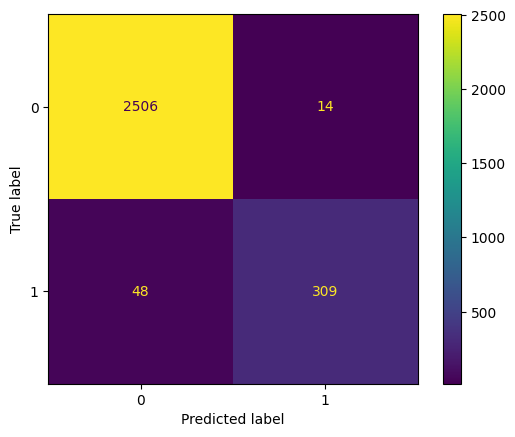

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
plt.show()


# HyperParameter-Tunning

In [85]:

def objective(trial):
    loss = trial.suggest_categorical('Loss',['log_loss', 'exponential'])
    learning_rate = trial.suggest_categorical('learning_rate',[0.1,0.01,0.2,0.001])
    n_estimator = trial.suggest_int('n_estimators',100,1500,step=100)
    criterion = trial.suggest_categorical('criterion',['friedman_mse', 'squared_error'])
    max_depth = trial.suggest_categorical('max_depth',[3,4,6,8,None])

    model = GradientBoostingClassifier(
        loss=loss,
        learning_rate=learning_rate,
        n_estimators=n_estimator,
        criterion=criterion,
        max_depth=max_depth
    )

    score = cross_val_score(estimator=model,X=x_train,y=y_train,scoring='accuracy',cv=3).mean()
    
    return score

In [86]:
import optuna

In [87]:
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())

[I 2025-01-17 16:38:49,339] A new study created in memory with name: no-name-a5f20e41-34d9-4db4-a9cc-a8dcdb78629e


In [88]:
study.optimize(objective,n_trials=15)

[I 2025-01-17 16:51:47,832] Trial 0 finished with value: 0.9712325057926937 and parameters: {'Loss': 'exponential', 'learning_rate': 0.001, 'n_estimators': 1400, 'criterion': 'squared_error', 'max_depth': 8}. Best is trial 0 with value: 0.9712325057926937.
[I 2025-01-17 17:04:26,326] Trial 1 finished with value: 0.9654096079185774 and parameters: {'Loss': 'log_loss', 'learning_rate': 0.001, 'n_estimators': 900, 'criterion': 'friedman_mse', 'max_depth': None}. Best is trial 0 with value: 0.9712325057926937.
[I 2025-01-17 17:07:09,046] Trial 2 finished with value: 0.8762384899524576 and parameters: {'Loss': 'exponential', 'learning_rate': 0.001, 'n_estimators': 300, 'criterion': 'squared_error', 'max_depth': 8}. Best is trial 0 with value: 0.9712325057926937.
[I 2025-01-17 17:11:50,767] Trial 3 finished with value: 0.9556755257608901 and parameters: {'Loss': 'exponential', 'learning_rate': 0.001, 'n_estimators': 1300, 'criterion': 'squared_error', 'max_depth': 3}. Best is trial 0 with va

In [89]:
study.best_params

{'Loss': 'log_loss',
 'learning_rate': 0.2,
 'n_estimators': 600,
 'criterion': 'friedman_mse',
 'max_depth': 3}

In [91]:
print(f"Best Accuracy on the GradientBoostingClassifier: {study.best_value}")

Best Accuracy on the GradientBoostingClassifier: 0.9727101242194648


# The Best model on this dataset is Gradient Boosting Model 